## Portfolio Exercise Starbucks
<br>

<img src="images/logo.jpg" width="200" height="200"/>
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their candidates.   The data for this exercise consists of about 120,000 data points split in 2:1 ratio among training and test files. Each data point includes one column indicating whether or not an individual was sent a promotion for a specific product, and one column indicating whether or not that individual eventually purchased that product. Each individual also had seven additional features associated with them.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user.  Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

Ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group.

* **Net Incremental Revenue (NIR)**

The total number of purchasers that received the promotion times 10 minus the number of promotions given times 0.15 minus the number of purchasers who were not given the promotion times 10.

For a full description of what starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the **promotion_strategy** function to pass to the **test_results** function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers.  

|   | Actual      |    |    | 
|---|-------------|----|----|
| **Predicted**   | Yes| No |  
| Yes             | **I**   | **II**|  
| No              | **III** | **IV**|  

The metrics are only being compared for the individual's we predict should obtain the promotion - that is quadrants I and II here.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equal participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 


Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final test_results function.

In [1]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('Datasets/training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [2]:
train_data.shape

(84534, 10)

### Invariant Metric

In [3]:
# Number of Individuals in Each Group
print(f"Indiciduals who recieve promotion: {(train_data['Promotion'] == 'Yes').sum()}")
print(f"Indiciduals who did not recieve promotion: {(train_data['Promotion'] == 'No').sum()}")

Indiciduals who recieve promotion: 42364
Indiciduals who did not recieve promotion: 42170


In [4]:
# Measurable Statistic in the difference of our group sizes
promo_avg = (train_data['Promotion'] == 'Yes').mean()
no_promo_avg = (train_data['Promotion'] == 'No').mean()
sample_diff = promo_avg - no_promo_avg

sample_diff

0.00229493458253488

In [5]:
# Bootstraping our Differences to get a model of the Distribution for our null
differences = []

for _ in range(10000):
    bootsample = train_data.sample(30000, replace=True)
    promo_avg = (bootsample['Promotion'] == 'Yes').mean()
    no_promo_avg = (bootsample['Promotion'] == 'No').mean()
    differences.append(promo_avg - no_promo_avg)

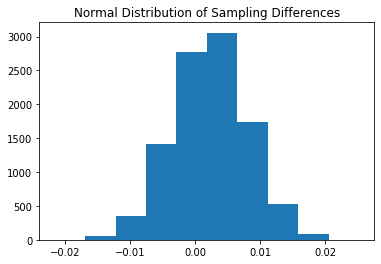

In [6]:
plt.hist(differences)
plt.title("Normal Distribution of Sampling Differences");

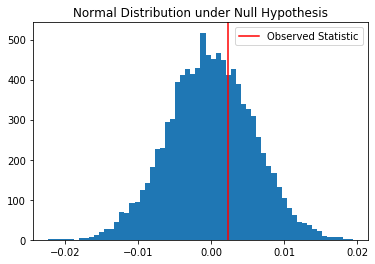

In [7]:
# Distribution of our null hypothesis
null_vals = np.random.normal(0, np.std(differences), 10000)
plt.hist(null_vals, bins=60)
plt.axvline(sample_diff, color='r', label='Observed Statistic')
plt.legend(loc='best')
plt.title('Normal Distribution under Null Hypothesis');

In [8]:
# Determining the Significance of our result
p_val = (sample_diff > null_vals).mean()
p_val

0.656

### Conclusion
Our P value is well within our confidence interval and therefore we fail to reject the null hypothesis. This implies that there is no statistical signifigance in the difference of our sampling populations. Awesome! Now, lets move forward with the analysis.

### Analyzing NIR Effect

In [9]:
# Finding our observed statistic 
purchase_treatment = train_data[train_data['Promotion'] == 'Yes'].purchase.sum()
customer_treatment = train_data[train_data['Promotion'] == 'Yes'].shape[0]

purchase_control = train_data[train_data['Promotion'] == 'No'].purchase.sum()
customer_control = train_data[train_data['Promotion'] == 'No'].shape[0]

NIR = (10 * purchase_treatment - 0.15 * customer_treatment) - 10 * purchase_control
NIR

-2334.5999999999995

In [10]:
# Bootstraping our differences to get a model of the distribution for our null
NIRs = []
for _ in range(10000):
    bootsample = train_data.sample(30000, replace=True)
    
    purchase_treatment = bootsample[bootsample['Promotion'] == 'Yes'].purchase.sum()
    customer_treatment = bootsample[bootsample['Promotion'] == 'Yes'].shape[0]

    purchase_control = bootsample[bootsample['Promotion'] == 'No'].purchase.sum()
    customer_control = bootsample[bootsample['Promotion'] == 'No'].shape[0]
    
    NIRs.append((10 * purchase_treatment - 0.15 * customer_treatment) - 10 * purchase_control)    

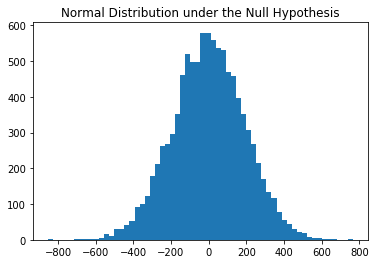

In [11]:
# Distribution of our null hypothesis
null_NIRs = np.random.normal(0, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis");

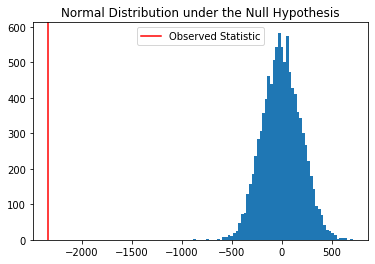

In [12]:
# Plotting under the null 
plt.axvline(NIR, color='r', label ="Observed Statistic")
null_NIRs = np.random.normal(0, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

In [13]:
# Checking the signifigane is 0
pval = (NIR > null_NIRs).mean()
pval

0.0

In [14]:
# Curious check to ensure all the data under the null lies above our observed statistic
pval2 = (NIR < null_NIRs).mean()
pval2

1.0

### Conclusion
Our P value is well below our confidence interval and therefore we fail to reject our null hypothesis. This implies that there is no statistical signifigant increase in NIR (what we want to optimise). However, our data indicates we signifigantly REDUCED the NIR with this campaign. Not what we want..

### Analyzing IIR Effect

In [15]:
# Finding our observed statistic 
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
customer_treatment = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
customer_control = train_data[train_data['Promotion'] == "No"].shape[0]

IRR = purchase_treatment/customer_treatment - purchase_control/customer_control
IRR

0.009454547819772702

In [16]:
# Bootstraping our differences to get a model of the distribution for our null
IRRs = []
for _ in range(10000):
    bootsample2 = train_data.sample(30000, replace=True)
    purchase_treatment = bootsample2[bootsample2['Promotion'] == "Yes"].purchase.sum()
    customer_treatment = bootsample2[bootsample2['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample2[bootsample2['Promotion'] == "No"].purchase.sum()
    customer_control = bootsample2[bootsample2['Promotion'] == "No"].shape[0]
    IRR_boot = purchase_treatment/customer_treatment - purchase_control/customer_control
    IRRs.append(IRR_boot)

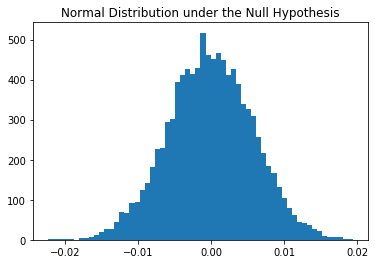

In [17]:
# Distribution of our null hypothesis
null_IRRs = np.random.normal(0, np.std(IRRs), 10000)
plt.hist(null_vals, bins=60)
plt.title("Normal Distribution under the Null Hypothesis");

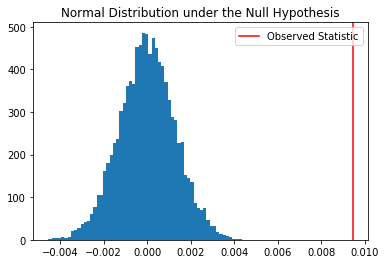

In [18]:
# Reviewing our observed statistic against the bootstrapped sample
plt.axvline(IRR, color='r', label ="Observed Statistic")
null_IRRs = np.random.normal(0, np.std(IRRs), 10000)
plt.hist(null_IRRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

In [19]:
# Calculating the signifigance of this result 
pval_IRR = (IRR>null_IRRs).mean()
pval_IRR

1.0

### Conclusion
Our P value is well above our null distribution and therefore we reject the null hypothesis. This implies that there is a statistical increase in IRR between our control and experiemental group. So, we can see that our campaign does have a positive affect on the number of customers who purchased the product with the promotion, as compared to if they didn't receive the promotion.

In [20]:
# Here we shall create a model that can accuractely predict if a customer will be responsive to the campaign.
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [21]:
train_data.shape

(84534, 10)

In [22]:
# Reviewing the number of individuals who purchased products in both the control and experiment condition 
train_data.groupby('Promotion').purchase.sum()

Promotion
No     319
Yes    721
Name: purchase, dtype: int64

In [23]:
# Copying the dataframe over 
data_exp = train_data.copy()

# Only considering the experiment group for our model training 
data_exp = data_exp[data_exp['Promotion']=="Yes"]

# Dropping the irrelavant columns 
data_exp.drop(['ID','Promotion'], axis = 1, inplace=True)

# Checking the shape is correct
data_exp.shape

(42364, 8)

In [24]:
# Splitting our data into predictors and target variables
X = data_exp.drop(['purchase'],axis=1)
y = data_exp.purchase

In [25]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# Scaling our inputs 
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Instantiating our model and fitting it
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# Loading in our test data 
test_data = pd.read_csv('./Datasets/test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [27]:
# Tailoring the test data to test our model 
data_exp_test = train_data.copy()
data_exp_test = data_exp_test[data_exp_test['Promotion']=="Yes"]
data_exp_test.drop(['ID','Promotion'], axis = 1, inplace=True)
X_test = data_exp_test.drop(['purchase'],axis=1)
y_test = data_exp_test.purchase

In [28]:
# Predicting our target values
y_pred = clf.predict(X_test)

# Checking our accuracy for the model 
accuracy = (y_pred == y_test).mean()
print("Our accuracy for the random forest model was {0:.5f}%".format(accuracy))

Our accuracy for the random forest model was 0.98298%


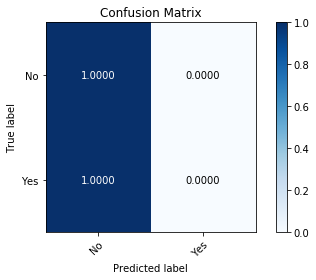

In [29]:
### Creating a confusion matrix visual
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
classes = ['No','Yes']
confusion_matrix  = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(confusion_matrix.shape[1]),
        yticks=np.arange(confusion_matrix.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title="Confusion Matrix",
        ylabel='True label',
        xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

fmt = '.4f'
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, format(confusion_matrix[i, j], fmt),
                ha="center", va="center",
                color="white" if confusion_matrix[i, j] > thresh else "black")
fig.tight_layout()
ax;

In [30]:
# Converting our numeric outputs to Yes/No's 
promotion_yes_no = []
for value in y_pred:
    if value == 0:
        promotion_yes_no.append("No")
    if value == 1:
        promotion_yes_no.append("Yes")

In [31]:
# Converting to a NumPy Array 
np.asarray(promotion_yes_no)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [32]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    df = min_max_scaler.fit_transform(df)
    
    y_pred = clf.predict(df)
    
    promotion_yes_no = []
    for value in y_pred:
        if value == 0:
            promotion_yes_no.append("No")
        if value == 1:
            promotion_yes_no.append("Yes")
            
    promotion = np.asarray(promotion_yes_no)
    
    return promotion

In [33]:
# This will test your results, and provide you back some information 
# on your how well your promotion_strategy will work in practice
from test_results import test_results, score
test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.13.

Your nir with this strategy is 17.75.
Approximately, the highest scores obtained at Udacity were: irr of 0.1 and an nir of 300.

 How did you do?


(0.13333333333333333, 17.75)